In [1]:
#https://rise.readthedocs.io/en/stable/usage.html

2

# Breakout Session Goals
In this Breakout session we will analyze our own Google Search History Takeouts to gain insights on 1) what we could potentially learn from this data source and 2) what the practical challenges of gathering data would be.

# Personal data downloads / takeouts
- Came about due to [GDPR](https://gdpr.eu/what-is-gdpr/)
- Allows researchers to partner with individuals - data donation approach
- Still subject to the data formatting of platforms which could change any time
- Can be confusing for participants to accomplish
- Can be hard hard for participants to see what data they are donating (and thus provide *informed* consent)

# Personal data downloads / takeouts
- HUGE advantage over other approaches, device agnostic - anywhere one is logged into the platform the data are collected
- Historical approach avoids '[hawthorn](https://en.wikipedia.org/wiki/Hawthorne_effect) / observation' effects issues
- Single platform - depends how concentrated individuals are to a single platform -- Google Search is widely used and [the search engine market overall is highly concentrated](https://gs.statcounter.com/search-engine-market-share)

# Introductions
- Depending on what introductions we have already done in the main session: 
    - Name
    - Title
    - University
    - Your interest in takeouts/search traces
    - Any prior experience with related approaches or data?

# How to download your search history from Google
- Go to [takeout.google.com](https://takeout.google.com)
- Click "Deselect all" button (so you are not downloading everything which would take a long time!)
- Check "My Activity"
- Click "multiple formats" and change from HTML to JSON and click OK
- At the bottom of the page click "Next Step"
- Click "Create export"

# How to download your search history from Google

- The Export Progress message will say it could take hours or days to complete, but it will only take a few minutes.
- You can view your export in progress: [https://takeout.google.com/takeout/downloads](https://takeout.google.com/takeout/downloads) you'll see it available for download soon. You may need to refresh the page.
- Click Download

# How to follow along in Python
- If you already know how to clone a github repository and open an ipynb file, here is the repository link: https://github.com/erickaakcire/explore_google_takeout
- If not I will show you how to open it in Google Colab (no need to install python, etc.). **Everyone can follow along!**

1. Login to Google and go to https://drive.google.com/ 
2. Create a new Google Colab document by going to New > More > Google Colabratory
    - If you do not see a "Google Colabratory" option, go to "Connect more apps" and choose Google Colabratory
    - When you have done this you have created a new blank ipynb python file on Googles servers
3. Now we need to import the ipynb file into your new Google Colab document. Go to File > Upload Notebook > click the Github tab. Enter this Github URL: https://github.com/erickaakcire/explore_google_takeout
    - It will find the one ipynb file, then just click on it to load it.

# Load your json file into Pandas
- If you are working locally, just change the path to your own
- If you are working on Google Colab, first upload the MyActivity.json file that you find in the Search folder to Google Colab. Click on the folder icon on the left, which will open up a file view where you can drag your file. To get the path of this file, click the three dots menu on the right of the file and choose "copy path" then just paste what you have inside the quotation marks in the cell below.

![google colab image](google_colab_1.png)

In [19]:
import pandas as pd
# CHANGE THE FILE PATH BELOW TO YOUR FILE PATH (LOCAL OR ON COLAB)
df = pd.read_json("/content/MyActivity.json")
df.head()

,header,title,titleUrl,time,products,activityControls,locationInfos,details,subtitles
0,Search,Visited How to Add R to Jupyter Notebook ? - G...,https://www.google.com/url?q=https://www.geeks...,2022-05-18T23:13:57.036Z,[Search],[Web & App Activity],NaN,NaN,NaN
1,Search,Visited dyld : Library not loaded: Reason: ima...,https://www.google.com/url?q=https://www.biost...,2022-05-18T23:09:28.840Z,[Search],[Web & App Activity],NaN,NaN,NaN
2,Search,Searched for dyld: Library not loaded: @rpath/...,https://www.google.com/search?q=dyld:+Library+...,2022-05-18T23:09:14.320Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN
3,Search,Visited Jupyter Notebook : HTTP 404: Not Found...,https://www.google.com/url?q=https://github.co...,2022-05-18T23:03:00.510Z,[Search],[Web & App Activity],NaN,NaN,NaN
4,Search,Searched for jupyter notebook r kernel not sta...,https://www.google.com/search?q=jupyter+notebo...,2022-05-18T23:02:56.912Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN


# Goal

## Display frequent search terms (unigrams) (overall, by month)

1. "searched for" and "visited" record types must be distinguished
2. Extract the month/year as a variable
3. Lower case the title field, take out punctuation, split by space to create a clean search words array
4. Remove stop words for your language(s)
5. Group by month and view the top X words per month

# First, general exploration

In [20]:
df.tail()

,header,title,titleUrl,time,products,activityControls,locationInfos,details,subtitles
50219,Search,Visited http://sinosphere.blogs.nytimes.com/20...,https://www.google.com/url?q=http://sinosphere...,2014-04-03T08:20:26.348Z,[Search],[Web & App Activity],NaN,NaN,NaN
50220,Search,Visited http://en.wikipedia.org/wiki/Bo_Xilai,https://www.google.com/url?q=http://en.wikiped...,2014-04-03T08:20:22.179Z,[Search],[Web & App Activity],NaN,NaN,NaN
50221,Search,Visited http://www.bbc.com/news/world-asia-chi...,https://www.google.com/url?q=http://www.bbc.co...,2014-04-03T08:20:20.328Z,[Search],[Web & App Activity],NaN,NaN,NaN
50222,Search,Searched for bo xilai,https://www.google.com/search?q=bo+xilai,2014-04-03T08:20:11.424Z,[Search],[Web & App Activity],NaN,NaN,NaN
50223,Search,Searched for 10 megabytes in bytes,https://www.google.com/search?q=10+megabytes+i...,2014-04-02T14:39:42.060Z,[Search],[Web & App Activity],NaN,NaN,NaN


In [21]:
df.shape

(50224, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            50224 non-null  object
 1   title             50224 non-null  object
 2   titleUrl          50019 non-null  object
 3   time              50224 non-null  object
 4   products          50224 non-null  object
 5   activityControls  50224 non-null  object
 6   locationInfos     19892 non-null  object
 7   details           71 non-null     object
 8   subtitles         11 non-null     object
dtypes: object(9)
memory usage: 3.4+ MB


# 'time' is not a timestamp!

In [23]:
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            50224 non-null  object             
 1   title             50224 non-null  object             
 2   titleUrl          50019 non-null  object             
 3   time              50224 non-null  datetime64[ns, UTC]
 4   products          50224 non-null  object             
 5   activityControls  50224 non-null  object             
 6   locationInfos     19892 non-null  object             
 7   details           71 non-null     object             
 8   subtitles         11 non-null     object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 3.4+ MB


In [24]:
df.describe()

/var/folders/3g/s_fz7w8j73b8ksc4116pztwc0000gn/T/ipykernel_52666/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,header,title,titleUrl,time,products,activityControls,locationInfos,details,subtitles
count,50224,50224,50019,50224,50224,50224,19892,71,11
unique,1,42066,42118,49818,1,1,1363,39,11
top,Search,Visited Google Search,https://www.google.com,2021-03-24 01:58:44.184000+00:00,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",[{'name': 'Referred from timeanddate.com'}],"[{'name': 'Including topics:'}, {'name': 'Dona..."
freq,50224,334,334,3,50224,50224,5798,6,1
first,NaN,NaN,NaN,2014-04-02 14:39:42.060000+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-05-18 23:13:57.036000+00:00,NaN,NaN,NaN,NaN,NaN


# Three columns have only 1 value

# We really only need two columns for this example

In [25]:
df = df[['title','time']]

In [26]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df.head()

,title,time,year,month
0,Visited How to Add R to Jupyter Notebook ? - G...,2022-05-18 23:13:57.036000+00:00,2022,5
1,Visited dyld : Library not loaded: Reason: ima...,2022-05-18 23:09:28.840000+00:00,2022,5
2,Searched for dyld: Library not loaded: @rpath/...,2022-05-18 23:09:14.320000+00:00,2022,5
3,Visited Jupyter Notebook : HTTP 404: Not Found...,2022-05-18 23:03:00.510000+00:00,2022,5
4,Searched for jupyter notebook r kernel not sta...,2022-05-18 23:02:56.912000+00:00,2022,5


# We just need searches, not visits

In [27]:
df['search_terms'] = df['title'].str.extract(r'Searched for (.*)', expand=False)

In [28]:
df = df.loc[(df['search_terms'].notnull())]
df.head()

,title,time,year,month,search terms
2,Searched for dyld: Library not loaded: @rpath/...,2022-05-18 23:09:14.320000+00:00,2022,5,dyld: Library not loaded: @rpath/libreadline.6...
4,Searched for jupyter notebook r kernel not sta...,2022-05-18 23:02:56.912000+00:00,2022,5,jupyter notebook r kernel not starting Error o...
6,Searched for jupyter notebook r kernel not sta...,2022-05-18 23:01:41.527000+00:00,2022,5,jupyter notebook r kernel not starting
8,Searched for hello world in r,2022-05-18 22:58:12.888000+00:00,2022,5,hello world in r
10,Searched for add r to jupyter notebook,2022-05-18 22:51:09.599000+00:00,2022,5,add r to jupyter notebook


In [34]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 765 kB/s eta 0:00:01
     |████████████████████████████████| 306 kB 802 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 888 kB/s eta 0:00:01
     |████████████████████████████████| 96 kB 944 kB/s eta 0:00:01
     |████████████████████████████████| 288 kB 801 kB/s eta 0:00:01


In [63]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/emt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/emt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
def tokenize(txt):
    words = word_tokenize(txt)
    return words

df['term_tokenized'] = df.apply(lambda row: tokenize(row['search_terms'].lower()), axis=1).copy()
df.tail()

,title,time,year,month,search terms,term_tokenized
2,Searched for dyld: Library not loaded: @rpath/...,2022-05-18 23:09:14.320000+00:00,2022,5,dyld: library not loaded: @rpath/libreadline.6...,"[dyld, :, library, not, loaded, :, @, rpath/li..."
4,Searched for jupyter notebook r kernel not sta...,2022-05-18 23:02:56.912000+00:00,2022,5,jupyter notebook r kernel not starting error o...,"[jupyter, notebook, r, kernel, not, starting, ..."
6,Searched for jupyter notebook r kernel not sta...,2022-05-18 23:01:41.527000+00:00,2022,5,jupyter notebook r kernel not starting,"[jupyter, notebook, r, kernel, not, starting]"
8,Searched for hello world in r,2022-05-18 22:58:12.888000+00:00,2022,5,hello world in r,"[hello, world, in, r]"
10,Searched for add r to jupyter notebook,2022-05-18 22:51:09.599000+00:00,2022,5,add r to jupyter notebook,"[add, r, to, jupyter, notebook]"


In [50]:
#clean the data by taking out extremely common words in your language(s)

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
#take out stop words & punctuation

def rm_punct(all_words):
    #Empty list to store words:
    words_no_punct = []

    #Removing punctuation marks :
    for w in all_words:
        if w not in stopwords:
            if w.isalpha():
                words_no_punct.append(w.lower())
    return words_no_punct

df['term_cleaned'] = df.apply(lambda row: rm_punct(row['term_tokenized']), axis=1).copy()
df.tail()

,title,time,year,month,search terms,term_tokenized,term_tokenized_no_punct,term_cleaned
50215,Searched for 20 kg in poinds,2014-04-04 06:08:33.201000+00:00,2014,4,20 kg in poinds,"[20, kg, in, poinds]","[kg, in, poinds]","[kg, poinds]"
50217,Searched for erasmus university map,2014-04-04 06:07:20.343000+00:00,2014,4,erasmus university map,"[erasmus, university, map]","[erasmus, university, map]","[erasmus, university, map]"
50218,Searched for Chicco - Lite Way Buggy,2014-04-03 15:46:21.812000+00:00,2014,4,chicco - lite way buggy,"[chicco, -, lite, way, buggy]","[chicco, lite, way, buggy]","[chicco, lite, way, buggy]"
50222,Searched for bo xilai,2014-04-03 08:20:11.424000+00:00,2014,4,bo xilai,"[bo, xilai]","[bo, xilai]","[bo, xilai]"
50223,Searched for 10 megabytes in bytes,2014-04-02 14:39:42.060000+00:00,2014,4,10 megabytes in bytes,"[10, megabytes, in, bytes]","[megabytes, in, bytes]","[megabytes, bytes]"


# Select a random month

In [54]:
# get a specific month
df_test = df.loc[(df['month'] == 5) & (df['year'] == 2015) & (df['term_cleaned'].notnull())]
df_test

,title,time,year,month,search terms,term_tokenized,term_tokenized_no_punct,term_cleaned
44579,Searched for d3 time interface examples,2015-05-31 19:02:32.222000+00:00,2015,5,d3 time interface examples,"[d3, time, interface, examples]","[time, interface, examples]","[time, interface, examples]"
44580,Searched for webcare,2015-05-31 12:16:32.482000+00:00,2015,5,webcare,[webcare],[webcare],[webcare]
44582,Searched for g. puglisi american university,2015-05-30 11:38:15.827000+00:00,2015,5,g. puglisi american university,"[g., puglisi, american, university]","[puglisi, american, university]","[puglisi, american, university]"
44583,Searched for G. Puglisi,2015-05-30 11:37:53.643000+00:00,2015,5,g. puglisi,"[g., puglisi]",[puglisi],[puglisi]
44588,Searched for class assignments with wikipedia,2015-05-30 11:17:48.187000+00:00,2015,5,class assignments with wikipedia,"[class, assignments, with, wikipedia]","[class, assignments, with, wikipedia]","[class, assignments, wikipedia]"
...,...,...,...,...,...,...,...,...
45127,Searched for google wallet,2015-05-01 10:52:55.979000+00:00,2015,5,google wallet,"[google, wallet]","[google, wallet]","[google, wallet]"
45129,"Searched for 'Selfiecity"" the American researc...",2015-05-01 10:40:05.985000+00:00,2015,5,"'selfiecity"" the american researchers lev mano...","['selfiecity, '', the, american, researchers, ...","[the, american, researchers, lev, manovich, an...","[american, researchers, lev, manovich, moritz,..."
45131,Searched for trello,2015-05-01 09:22:10.936000+00:00,2015,5,trello,[trello],[trello],[trello]
45132,Searched for maryland county map,2015-05-01 07:13:06.914000+00:00,2015,5,maryland county map,"[maryland, county, map]","[maryland, county, map]","[maryland, county, map]"


# For this month, glom all of the search terms together

In [70]:
list_of_lists = df_test.term_cleaned.tolist()
flat_list = [item for sublist in list_of_lists for item in sublist]
as_text = ' '.join(flat_list)

### Now we can see the most comon unigrams of the month

In [66]:
#Frequency distribution :
fdist = FreqDist(flat_list)

fdist.most_common(10)

[('javascript', 22),
 ('google', 20),
 ('chrome', 18),
 ('cloud', 14),
 ('extension', 12),
 ('data', 11),
 ('dc', 10),
 ('xmlhttprequest', 9),
 ('wordpress', 9),
 ('american', 8)]

# No text data presentation is complete without...

In [ ]:
!pip install wordcloud

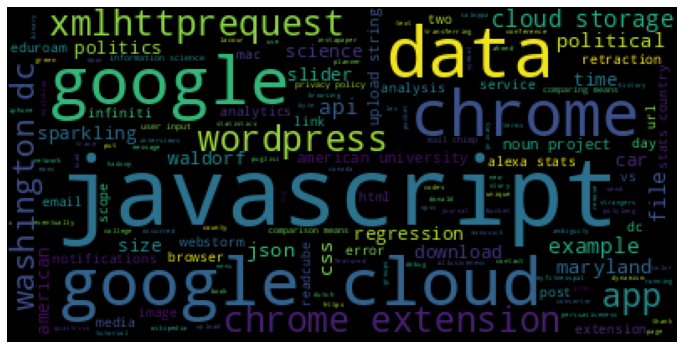

In [72]:
#Library to form wordcloud :
from wordcloud import WordCloud

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

#Generating the wordcloud :
wordcloud = WordCloud().generate(as_text)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

# Discuss
### (this is a great class activity, btw)
### What kinds of questions would you like to answer with this type of dataset?
### How can we incorporate this type of data into our research in an ethical and practical way?
    https://github.com/ccs-amsterdam/DigitalFootprintsLab